# Assignment 2: Recognition using histograms, convolution and image filtering

## Exercise 1: Global approach to image description

### a) Implement the function `myhist3` that computes a 3D histogram from a three channel image. The resulting histogram is stored in a 3D matrix. The size of the resulting histograms is determined by the parameter `n_bins`. Normalize the histogram.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [17]:
def myhist3(img, n_bins):
    hist = np.zeros((n_bins, n_bins, n_bins))
    step = 256 // n_bins

    for i in range(img.shape[0]):
        for j in range (img.shape[1]):
            r_bin = img[i,j,0] // step
            g_bin = img[i,j,1] // step
            b_bin = img[i,j,2] // step
            hist[r_bin, g_bin, b_bin] += 1

    hist = hist / np.linalg.norm(hist)
    return hist

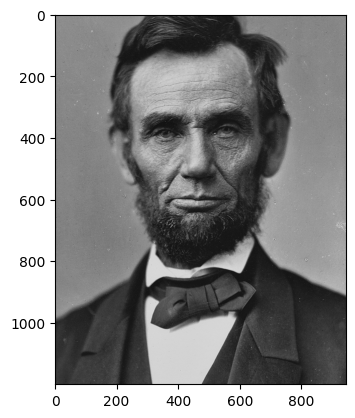

In [19]:
img = cv2.imread("images/lincoln.jpg")
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

n_bins = 128
hist = myhist3(img, n_bins)
#tags = np.array([[[int(j) for j in range(n_bins)] for i in range(n_bins)] for x in range(n_bins)])



### b) In order to perform image comparison using histograms we need to implement some distance measures, defined for 2 input histograms, returning a scalar value representing the similarity. Implement a function `compare_histograms` that accepts thow histograms and a string that identifies the distance measure you wish to calculate. Start with the `L2 metric - Euclidean distance`. Also implement the following measures: `Chi-square distance`, `Intersection`, `Hellinger distance`. Try to avoid looping over histogram values and instead use vector opreations on entire matrices at once.